In [ ]:
!gdown --folder --id 1B19RWODijlUlXEdvLKxjcmlg-BiJcbWE -O /content/shared_folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7 coco2017_subset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7
From (redirected): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7&confirm=t&uuid=026474d5-a2cd-480e-af93-733c2db0ad02
To: /content/shared_folder/coco2017_subset.zip
100% 6.71G/6.71G [01:23<00:00, 80.8MB/s]
Download completed


In [ ]:
import os
os.listdir("/content/shared_folder")

['coco2017_subset.zip']

In [ ]:
!unzip /content/shared_folder/coco2017_subset.zip -d /content/extracted_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508972.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508984.jpg  
  inflating: /content/extracted_file

In [ ]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [ ]:
# Path to your COCO annotation file (change this to your subset JSON file)
ANNOTATION_FILE = '/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_val2017_subset.json'
# Folder where the corresponding images are stored
IMAGE_FOLDER = '/content/extracted_files/coco2017_subset/val2017'

In [ ]:
# Initialize COCO API for instance annotations
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


In [ ]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random
from skimage import io

In [ ]:
#Getting the images IDs

img_ids = coco.getImgIds()
if not img_ids:
    raise ValueError("No images found in the annotation file!")

In [ ]:
#Loading the first image from the dataset

img_data = coco.loadImgs(img_ids[1])[0]

In [ ]:
#Constructing the image path and load it using OpenCV

img_path = os.path.join(IMAGE_FOLDER, img_data['file_name'])
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

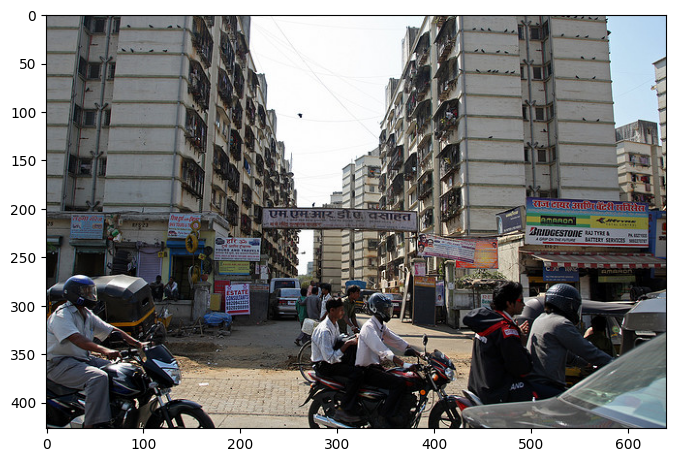

In [ ]:
#Converting image from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image)

In [19]:
# Getting all category IDs
category_ids = coco.getCatIds()

# Loading category names
categories = coco.loadCats(category_ids)

# Extracting names
class_names = [category['name'] for category in categories]

print("Classes in the dataset:", class_names)

Classes in the dataset: ['person']


In [27]:
#Path to your COCO annotation file which includes all classes- json file

ANNOTATION_FILE_1 = r"/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = r"/content/extracted_files/coco2017_subset/train2017"

In [28]:
#Initializing COCO API for instance annotations

coco1 = COCO(ANNOTATION_FILE_1)

loading annotations into memory...
Done (t=6.90s)
creating index...
index created!


In [29]:

# Get all category IDs and their names
category_ids = coco1.getCatIds()
categories = coco1.loadCats(category_ids)
category_names = {cat['id']: cat['name'] for cat in categories}

# Get the number of classes
num_classes = len(category_ids)

# Get the total number of images
img_ids = coco1.getImgIds()
num_images = len(img_ids)

# Print total counts
print(f"Number of classes: {num_classes}")
print(f"Number of images: {num_images}")

# Dictionary to store the number of images per class
class_image_count = {}

# Count the number of images for each class
for cat_id in category_ids:
    img_ids = coco1.getImgIds(catIds=[cat_id])  # Get images containing this class
    class_image_count[category_names[cat_id]] = len(img_ids)

# Convert dictionary to DataFrame
df = pd.DataFrame(list(class_image_count.items()), columns=['Category Name', 'Number of Images'])

# Ensure all rows are displayed
pd.set_option('display.max_rows', None)

# Display the table
print("\nNumber of images per class:")
print(df)

Number of classes: 80
Number of images: 29571

Number of images per class:
     Category Name  Number of Images
0           person             15978
1          bicycle               808
2              car              3063
3       motorcycle               857
4         airplane               781
5              bus               951
6            train               872
7            truck              1572
8             boat               772
9    traffic light               967
10    fire hydrant               432
11       stop sign               458
12   parking meter               176
13           bench              1354
14            bird               826
15             cat              1064
16             dog              1149
17           horse               767
18           sheep               381
19             cow               463
20        elephant               528
21            bear               231
22           zebra               485
23         giraffe               644


In [30]:
# Analyze COCO dataset statistics with clear organization and comments

# 1. Count basic dataset elements
num_images = len(coco1.dataset['images'])
num_boxes = len(coco1.dataset['annotations'])
num_classes = len(coco1.dataset['categories'])

# 2. Collect image dimensions
# Create lists of all image heights and widths
image_heights = []
image_widths = []
for image in coco1.dataset['images']:
    image_heights.append(image['height'])
    image_widths.append(image['width'])

# 3. Calculate dimension statistics
# Height statistics
max_height = max(image_heights)
min_height = min(image_heights)
avg_height = sum(image_heights) // num_images  # Integer division for pixel value

# Width statistics
max_width = max(image_widths)
min_width = min(image_widths)
avg_width = sum(image_widths) // num_images   # Integer division for pixel value

# 4. Display comprehensive dataset summary
print("=== COCO Dataset Summary ===")
# Extract the filename from the path
dataset_name = ANNOTATION_FILE_1.split(os.sep)[-1]
print(f"Dataset filename: {dataset_name}")
print(f"Total images: {num_images}")
print(f"Total annotations: {num_boxes}")
print(f"Total classes: {num_classes}")
print("\n--- Image Dimensions ---")
print(f"Height range: {min_height} to {max_height} pixels (avg: {avg_height})")
print(f"Width range: {min_width} to {max_width} pixels (avg: {avg_width})")

=== COCO Dataset Summary ===
Dataset filename: instances_train2017_subset.json
Total images: 29571
Total annotations: 212806
Total classes: 80

--- Image Dimensions ---
Height range: 51 to 640 pixels (avg: 483)
Width range: 72 to 640 pixels (avg: 577)


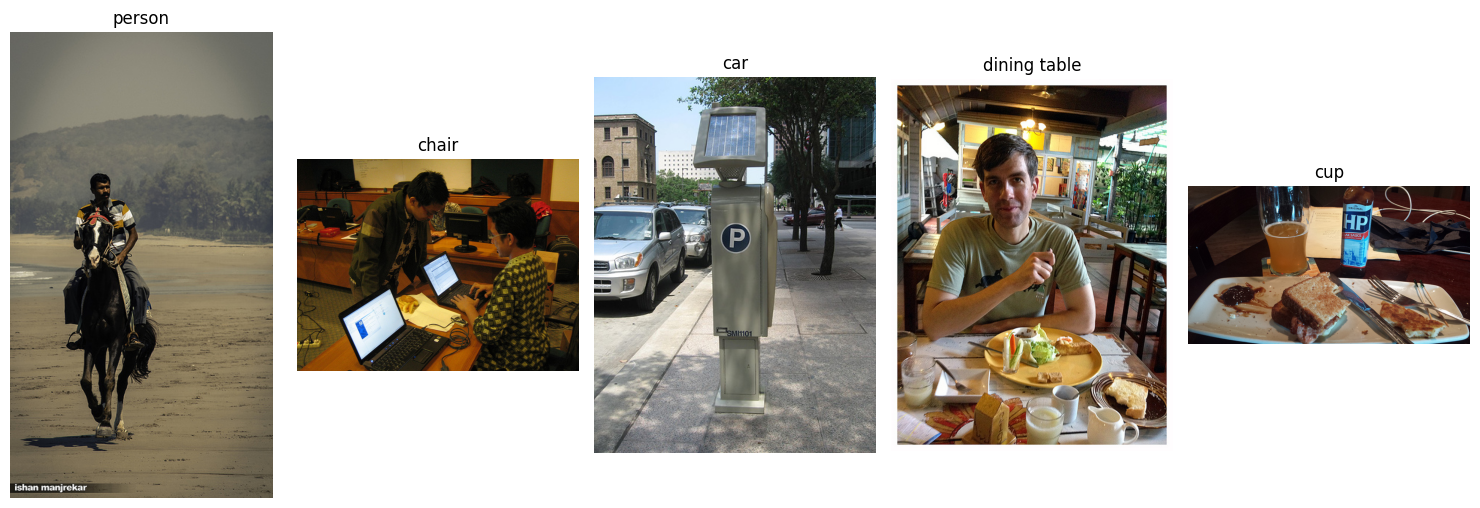

In [32]:
# Count images per class
class_image_count = {cat_id: len(coco1.getImgIds(catIds=[cat_id])) for cat_id in category_ids}

# Sort categories by number of images and get the top 10
top_classes = sorted(class_image_count.items(), key=lambda x: x[1], reverse=True)[:5]

# Load and display one image from each of the top 10 classes
plt.figure(figsize=(15, 10))

for i, (cat_id, _) in enumerate(top_classes):
    img_ids = coco1.getImgIds(catIds=[cat_id])
    if not img_ids:
        continue
    random_img_id = random.choice(img_ids)  # Randomly pick an image from the class
    img_data = coco1.loadImgs(random_img_id)[0]
    img_path = os.path.join(IMAGE_FOLDER, img_data['file_name'])
    image = io.imread(img_path)

    # Plot image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(category_names[cat_id])

plt.tight_layout()
plt.show()

 COUNT OBJECTS PER CATEGORY



Top 5 most common objects:
- person: 65165 objects
- car: 10945 objects
- chair: 9703 objects
- book: 6185 objects
- bottle: 5780 objects


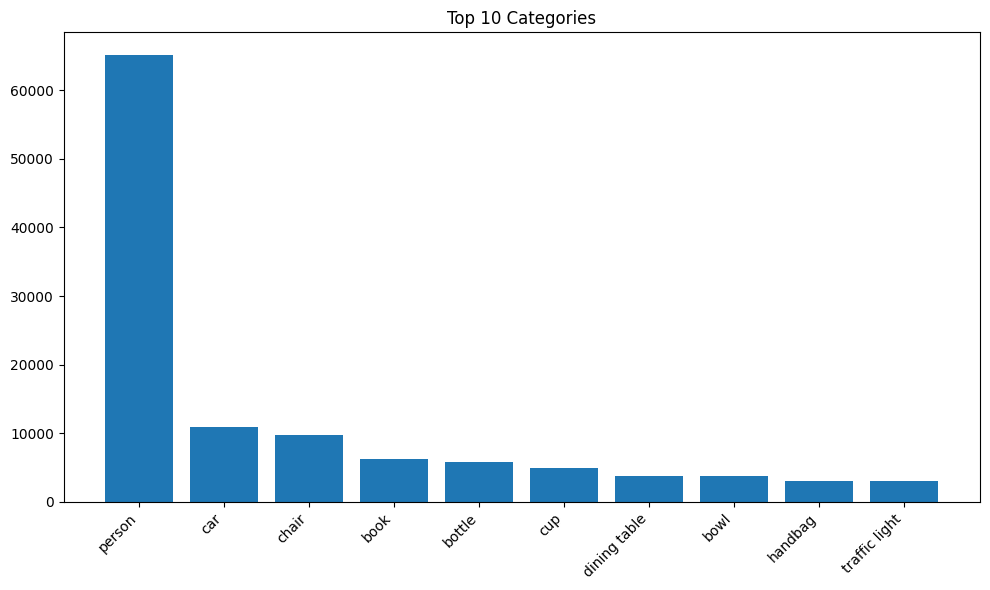

In [33]:

# Create an empty dictionary to store our counts
category_counts = {}

# Go through each annotation (object) in the dataset
for annotation in coco1.dataset['annotations']:
    # Get the category ID of this object
    cat_id = annotation['category_id']

    # Increase the count for this category
    if cat_id in category_counts:
        category_counts[cat_id] += 1
    else:
        category_counts[cat_id] = 1

# Print the 5 most common categories
print("Top 5 most common objects:")
for cat_id, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
    category_name = category_names[cat_id]  # Get readable name
    print(f"- {category_name}: {count} objects")

# Make a simple bar chart of the top 10 categories
plt.figure(figsize=(10, 6))
top_cats = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:10]
names = [category_names[cat_id] for cat_id, _ in top_cats]
counts = [count for _, count in top_cats]

plt.bar(names, counts)
plt.title('Top 10 Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ANALYZE OBJECT SIZES

Average object width: 104.1 pixels
Average object height: 107.6 pixels


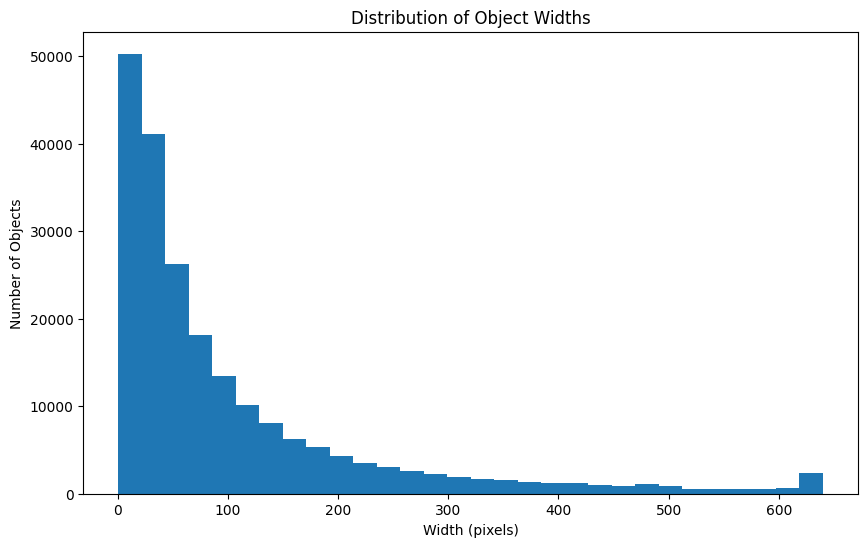

In [34]:
all_widths = []
all_heights = []

# Go through each annotation and extract the width and height
for annotation in coco1.dataset['annotations']:
    # Get bounding box [x, y, width, height]
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]

    # Store these values
    all_widths.append(width)
    all_heights.append(height)

# Calculate average sizes
avg_width = sum(all_widths) / len(all_widths)
avg_height = sum(all_heights) / len(all_heights)

print(f"Average object width: {avg_width:.1f} pixels")
print(f"Average object height: {avg_height:.1f} pixels")

# Create a simple histogram of object widths
plt.figure(figsize=(10, 6))
plt.hist(all_widths, bins=30)
plt.title('Distribution of Object Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Number of Objects')
plt.show()

OBJECTS PER IMAGE

Average objects per image: 7.3
Maximum objects in one image: 78
Images with only 1 object: 3435


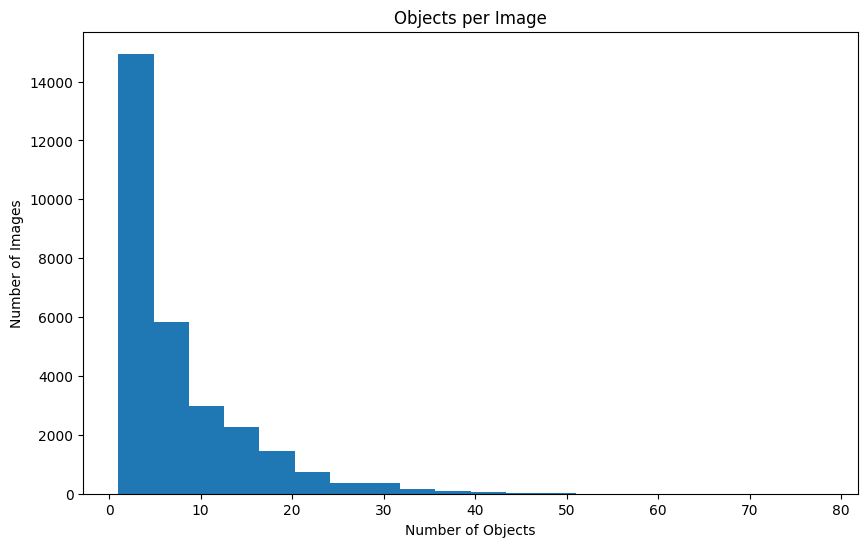

In [35]:
objects_per_image = {}

# Go through each annotation and count how many objects are in each image
for annotation in coco1.dataset['annotations']:
    image_id = annotation['image_id']

    # Increase the count for this image
    if image_id in objects_per_image:
        objects_per_image[image_id] += 1
    else:
        objects_per_image[image_id] = 1

# Get list of counts
counts = list(objects_per_image.values())

# Print some basic stats
print(f"Average objects per image: {sum(counts) / len(counts):.1f}")
print(f"Maximum objects in one image: {max(counts)}")
print(f"Images with only 1 object: {counts.count(1)}")

# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=20)
plt.title('Objects per Image')
plt.xlabel('Number of Objects')
plt.ylabel('Number of Images')
plt.show()

SIMPLE IMAGE RESIZING

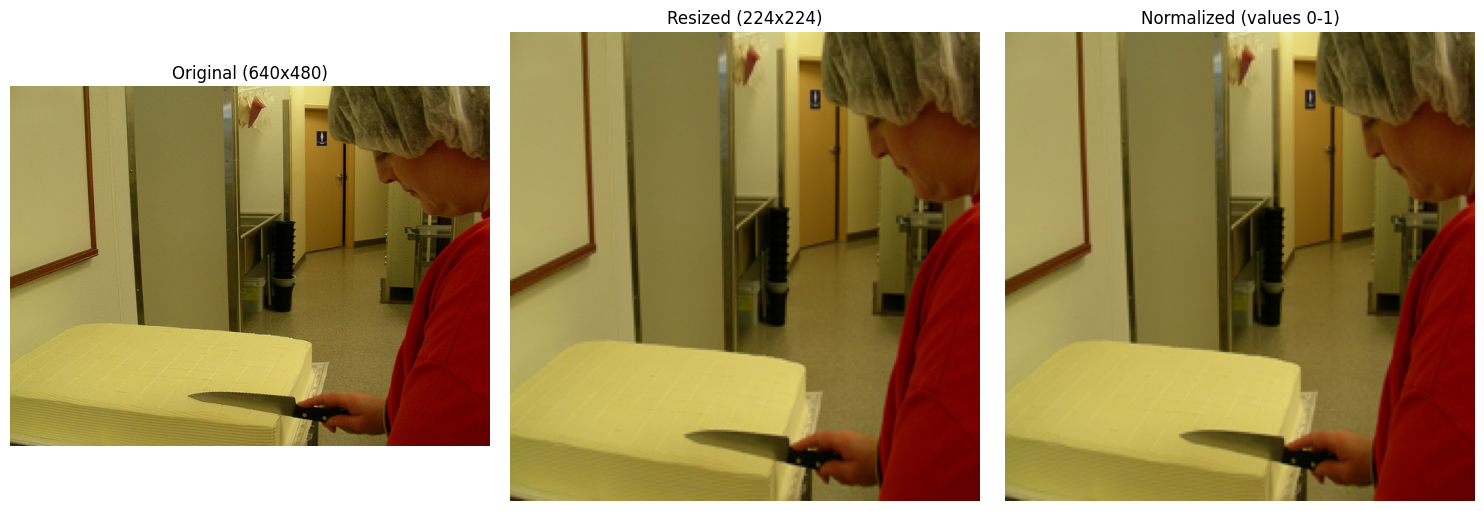

In [40]:

# First, make sure we import PIL's Image class
from PIL import Image

# Define a simple function to resize an image
def resize_image(image, new_size=(224, 224)):
    """
    Resize an image to a new size

    Parameters:
        image: The image to resize
        new_size: The target size as (width, height)

    Returns:
        The resized image
    """
    # Convert to PIL image for easy resizing
    pil_image = Image.fromarray(image)

    # Resize the image
    resized = pil_image.resize(new_size)

    # Convert back to numpy array
    return np.array(resized)

# Define a simple function to normalize an image
def normalize_image(image):
    """
    Normalize image values to be between 0 and 1

    Parameters:
        image: The image to normalize

    Returns:
        The normalized image
    """
    # Divide by 255 to get values between 0 and 1
    return image / 255.0

# Load a sample image
sample_img_id = coco1.getImgIds()[0]  # Get first image
img_info = coco1.loadImgs(sample_img_id)[0]
img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])
sample_image = io.imread(img_path)

# Apply our functions
resized_image = resize_image(sample_image)
normalized_image = normalize_image(resized_image)

# Show the images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title(f"Original ({sample_image.shape[1]}x{sample_image.shape[0]})")
plt.axis('off')

# Resized image
plt.subplot(1, 3, 2)
plt.imshow(resized_image)
plt.title("Resized (224x224)")
plt.axis('off')

# Normalized image
plt.subplot(1, 3, 3)
plt.imshow(normalized_image)
plt.title("Normalized (values 0-1)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
# Visualize Bounding Boxes on COCO Dataset Images
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np
from PIL import Image
import os

# Step 1: Select a random image from the dataset
random_img_id = random.choice(coco1.getImgIds())
img_info = coco1.loadImgs(random_img_id)[0]
img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

# Step 2: Load the image
image = plt.imread(img_path)

# Step 3: Get all annotations (bounding boxes) for this image
annotation_ids = coco1.getAnnIds(imgIds=random_img_id)
annotations = coco1.loadAnns(annotation_ids)

# Step 4: Create a figure to display the image with bounding boxes
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis('off')
plt.title(f'Image: {img_info["file_name"]} with {len(annotations)} objects')

# Step 5: Generate random colors for different categories
# This ensures each category has a consistent color
np.random.seed(42)  # For reproducible colors
colors = {cat_id: np.random.rand(3,) for cat_id in category_ids}

# Step 6: Draw each bounding box on the image
for ann in annotations:
    # Get bounding box coordinates [x, y, width, height]
    bbox = ann['bbox']
    x, y, width, height = [int(coord) for coord in bbox]

    # Get category ID and name
    category_id = ann['category_id']
    category_name = category_names[category_id]

    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle(
        (x, y),                  # (x, y) of bottom-left corner
        width, height,           # width, height of rectangle
        linewidth=2,             # line thickness
        edgecolor=colors[category_id],  # color based on category
        facecolor='none',        # transparent fill
        alpha=0.7                # slightly transparent edges
    )

    # Add the rectangle to the plot
    plt.gca().add_patch(rect)

    # Add text label with category name
    plt.text(
        x, y - 5,                # Position (slightly above box)
        category_name,           # Text to display
        color='white',           # Text color
        fontsize=10,             # Font size
        bbox=dict(               # Background box for text
            facecolor=colors[category_id],
            alpha=0.7,
            edgecolor='none',
            pad=1
        )
    )

plt.tight_layout()
plt.show()

# Step 7: Function to display multiple images with bounding boxes
def display_images_with_boxes(num_images=4):
    """
    Display multiple random images with their bounding boxes

    Parameters:
        num_images: Number of images to display (default: 4)
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # For each subplot
    for i in range(min(num_images, 4)):
        # Get a random image
        random_img_id = random.choice(coco1.getImgIds())
        img_info = coco1.loadImgs(random_img_id)[0]
        img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

        # Load the image
        image = plt.imread(img_path)

        # Get all bounding boxes for this image
        ann_ids = coco1.getAnnIds(imgIds=random_img_id)
        anns = coco1.loadAnns(ann_ids)

        # Display the image
        axes[i].imshow(image)
        axes[i].set_title(f"{len(anns)} objects")
        axes[i].axis('off')

        # Draw each bounding box
        for ann in anns:
            # Get box coordinates
            x, y, width, height = [int(coord) for coord in ann['bbox']]

            # Get category
            cat_id = ann['category_id']

            # Create and add rectangle
            rect = patches.Rectangle(
                (x, y), width, height,
                linewidth=2,
                edgecolor=colors[cat_id],
                facecolor='none',
                alpha=0.7
            )
            axes[i].add_patch(rect)

    plt.tight_layout()
    plt.show()

# Step 8: Call the function to display multiple images
display_images_with_boxes(4)

# Step 9: Function to focus on a specific category
def show_category_examples(category_name, num_images=4):
    """
    Display images containing a specific category

    Parameters:
        category_name: Name of the category to find
        num_images: Number of images to display (default: 4)
    """
    # Find the category ID from the name
    category_id = None
    for cat_id, name in category_names.items():
        if name.lower() == category_name.lower():
            category_id = cat_id
            break

    if category_id is None:
        print(f"Category '{category_name}' not found. Available categories:")
        print(", ".join(sorted(set(category_names.values()))))
        return

    # Get image IDs containing this category
    img_ids = coco1.getImgIds(catIds=[category_id])

    if not img_ids:
        print(f"No images found containing '{category_name}'")
        return

    # Randomly select images
    selected_ids = random.sample(img_ids, min(num_images, len(img_ids)))

    # Create a grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # For each selected image
    for i, img_id in enumerate(selected_ids):
        if i >= 4:  # Limit to 4 images
            break

        # Get image info and load image
        img_info = coco1.loadImgs(img_id)[0]
        img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])
        image = plt.imread(img_path)

        # Get all annotations for this image
        ann_ids = coco1.getAnnIds(imgIds=img_id)
        anns = coco1.loadAnns(ann_ids)

        # Display the image
        axes[i].imshow(image)
        axes[i].set_title(f"Example {i+1} of '{category_name}'")
        axes[i].axis('off')

        # Draw each bounding box
        for ann in anns:
            x, y, width, height = [int(coord) for coord in ann['bbox']]
            cat_id = ann['category_id']

            # Highlight boxes of the requested category
            if cat_id == category_id:
                # Thicker line for the target category
                rect = patches.Rectangle(
                    (x, y), width, height,
                    linewidth=3,
                    edgecolor='red',  # Fixed color for target category
                    facecolor='none',
                    alpha=0.9
                )
            else:
                # Thinner, more transparent line for other categories
                rect = patches.Rectangle(
                    (x, y), width, height,
                    linewidth=1,
                    edgecolor=colors[cat_id],
                    facecolor='none',
                    alpha=0.4
                )

            axes[i].add_patch(rect)

            # Add label for the target category
            if cat_id == category_id:
                axes[i].text(
                    x, y - 5,
                    category_name,
                    color='white',
                    fontsize=10,
                    bbox=dict(facecolor='red', alpha=0.7, pad=1)
                )

    plt.tight_layout()
    plt.show()

# Step 10: Try the function with a specific category (e.g., "person")
# Replace "person" with any category in your dataset
show_category_examples("person")

Output hidden; open in https://colab.research.google.com to view.